# Solución de sistemas de ecuaciones lineales 


En los modelos presa-depredador que hemos estudiado no se ha tenido en cuenta un hecho 
importante como es la interacción de los animales de una misma especie, ya que compiten por la 
misma  fuente  de  alimentación,  provocando,  por  ejemplo,  que  una  especie  tienda  a  la  extinción,  
mientras  que  la  otra  se  aproxime  a  su  capacidad  de  carga,  o  bien  pudiese  ocurrir  que  las  dos  
especies, en función de los recursos disponibles, tiendan a un estado de equilibrio. 
Para  poner  de  manifiesto  estos  diversos  comportamientos,  vamos  a  construir  un  nuevo  
modelo alterando ligeramente las hipótesis del presa-depredador.  Supongamos que $x(t)$ 
representa  al  número  de  compradores  en  un  tiempo  $t$,  mientras  que  $y(t)$  sean  los  vendedores  
presentes  en  el  tiempo  $t$.  En  el    modelo  modificado  de  Lotka-Volterra  observamos  que  en  
ausencia de vendedores, los compradores evolucionan según el modelo logístico, 
$$𝑥 ́(𝑡) = 𝑥(𝑡)(𝑎−𝑏𝑥(𝑡))$$
Simultáneamente, si no existieran compradores, la velocidad de crecimiento de los 
vendedores estaría gobernada por la ecuación diferencial, 
$$𝑦 ́(𝑡) = 𝑦(𝑡)(𝑐−𝑑𝑦(𝑡))$$ 
Es decir, se ha introducido la interacción entre compradores dada por $bx(t)x(t)$, y la de los 
vendedores $dy(t)y(t)$, dependiendo su intensidad de los parámetros $b$ y $d$.  

Aqui mostraremos como aproximar un sistema de ecuaciones diferenciales de $2 \times 2$, para ello estudiaremos en primera parte el sistema de Loka-Volterra

$$\begin{cases}\frac{dx}{dt}=x(t)(a -bx(t)-m y(t))\\
\frac{dy}{dt}=y(t)(c -dy(t)-n x(t))
\end{cases}$$
con un análisis cualitativo podremos detallar el modelo

## Ejemplo particular

$$\begin{cases}\frac{dx}{dt}=x(t)(0.3 -0.01x(t)-0.06 y(t))\\
\frac{dy}{dt}=y(t)(c -0.0055x(t)-0.009 y(t))
\end{cases}$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from IPython.html.widgets import interact 
from IPython.html.widgets import interactive
import random as ra


def df_dt(x, t,A):

## coexistencia

  dx = x[0]*( A[0][0]- A[0][1]* x[0]-A[0][2]*x[1])
  dy = x[1]*( A[1][0]- A[1][1]* x[0]-A[1][2]*x[1])
  return np.array([dx, dy])
def sol(m,n):
  # Parámetros
  A=np.zeros((2, 3))
  A[0][0] = 0.26
  A[0][1] = 0.021
  A[1][0] = 0.06
  A[1][1]=0.01
  A[0][2]=m
  A[1][2]=n

  # Condiciones iniciales
  x0 = 7   # Compradores
  y0 = 2    # Vendedores
  conds_iniciales = np.array([x0, y0])
  # Condiciones para integración
  tf = 1000
  N = 800
  t = np.linspace(0, tf, N)
  X = odeint(df_dt, conds_iniciales, t, args=((A,)))
  plt.plot(t, X[:, 0], label='presa')
  plt.plot(t, X[:, 1], label='depredador')
  plt.xlabel('Tiempo')
  plt.ylabel('Presas-Depredadores')
  plt.rcParams["figure.figsize"] = (10,10)
  plt.show()
  ######
  x_max = np.max(X[:,0]) * 1.05
  y_max = np.max(X[:,1]) * 1.05
  x = np.linspace(0, x_max, 25)
  y = np.linspace(0, y_max, 25)
  xx, yy = np.meshgrid(x, y)
  uu, vv = df_dt((xx, yy), 0,A)
  norm = np.sqrt(uu**2 + vv**2)
  uu = uu / norm
  vv = vv / norm
  plt.quiver(xx, yy, uu, vv, norm, cmap=plt.cm.gray)
  plt.xlabel('Compradores')
  plt.ylabel('Vendedores')
  np.random.seed(5)
  #for n in range(10):
  #  conds_iniciales=25*np.random.rand(2)
  #  X = odeint(df_dt, conds_iniciales, t, args=(a, b, c, d))
  y1=(1.0/A[0][2])*(A[0][0]-A[0][1]*x)
  y2=(1.0/A[1][2])*(A[1][0]-A[1][1]*x)
  s=np.logical_and(0<y1,y1<y_max)
  yy1=y1[s]
  xx1=x[s]
  s=np.logical_and(0<y2,y2<y_max)
  yy2=y2[s]
  xx2=x[s]
  s1=np.logical_and(0<X[:, 1],X[:, 1]<y_max)
  s2=np.logical_and(0<X[:, 0],X[:, 0]<y_max)
  s=np.logical_and(s1,s2)
  plt.plot(X[:, 0], X[:, 1])
  conds_iniciales= np.array([1, 1])
  
  X = odeint(df_dt, conds_iniciales, t, args=((A,)))
  plt.plot(xx1,yy1,'r')
  plt.plot(xx2,yy2,'r')

  s1=np.logical_and(0<X[:, 1],X[:, 1]<y_max)
  s2=np.logical_and(0<X[:, 0],X[:, 0]<y_max)
  s=np.logical_and(s1,s2)
  plt.plot(X[s, 0], X[s, 1])
  plt.rcParams["figure.figsize"] = (10,10)
  plt.show()
  len(xx1)




/usr/local/lib/python3.7/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
xx=np.array([-1,2,3,4,5,6])
s1=0<xx
s2=xx<3
print(s1)
print(s2)
s=np.logical_and(0<xx,xx<3)
print(s)

[False  True  True  True  True  True]
[ True  True False False False False]
[False  True False False False False]


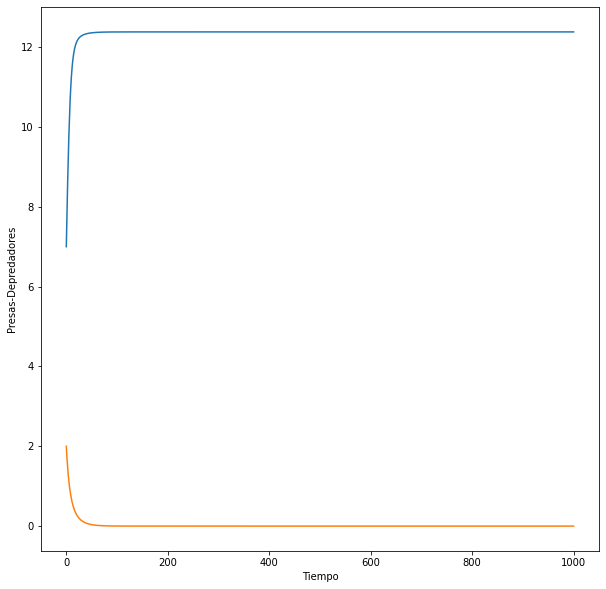

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in true_divide


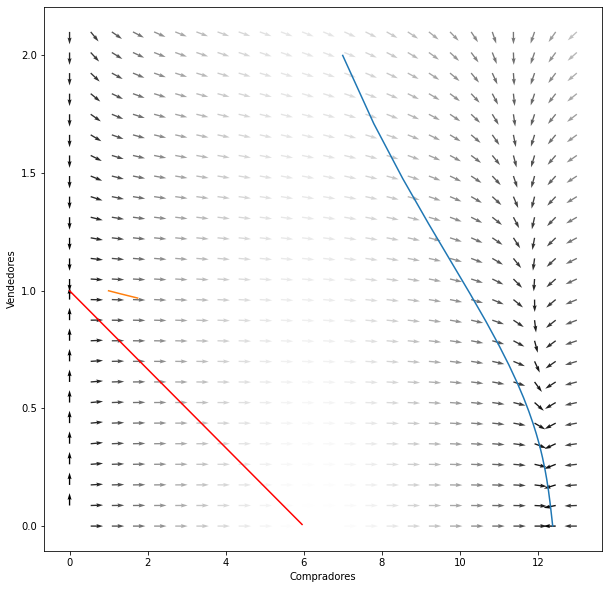

In [4]:
sol(0.01,0.06)